In [62]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Gathering Data

In [3]:
df = pd.read_csv("House Price Prediction Dataset.csv")

In [4]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


# understanding data

In [5]:
df.shape

(2000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [7]:
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [8]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df['Location'].unique()

array(['Downtown', 'Suburban', 'Urban', 'Rural'], dtype=object)

In [11]:
df['Garage'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
df['Condition'].unique()

array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

<Axes: ylabel='Area'>

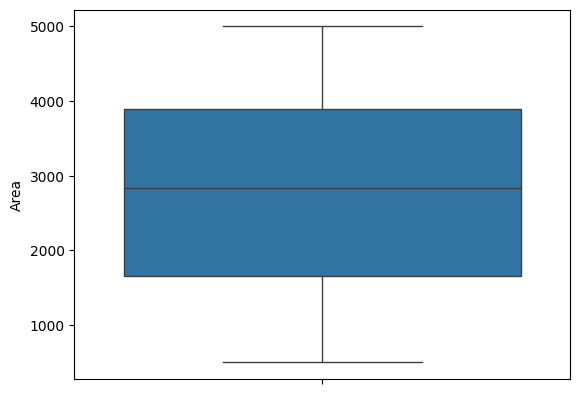

In [13]:
sns.boxplot(df['Area'])

<Axes: ylabel='YearBuilt'>

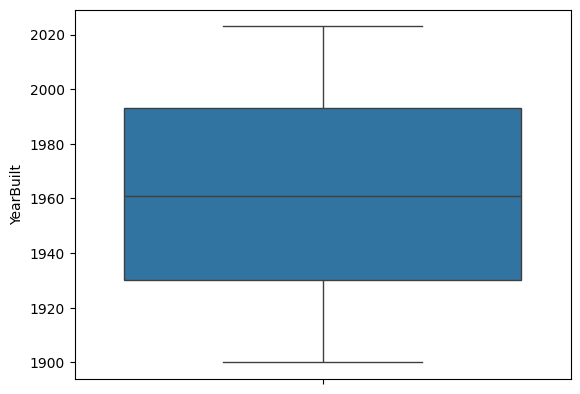

In [14]:
sns.boxplot(df['YearBuilt'])

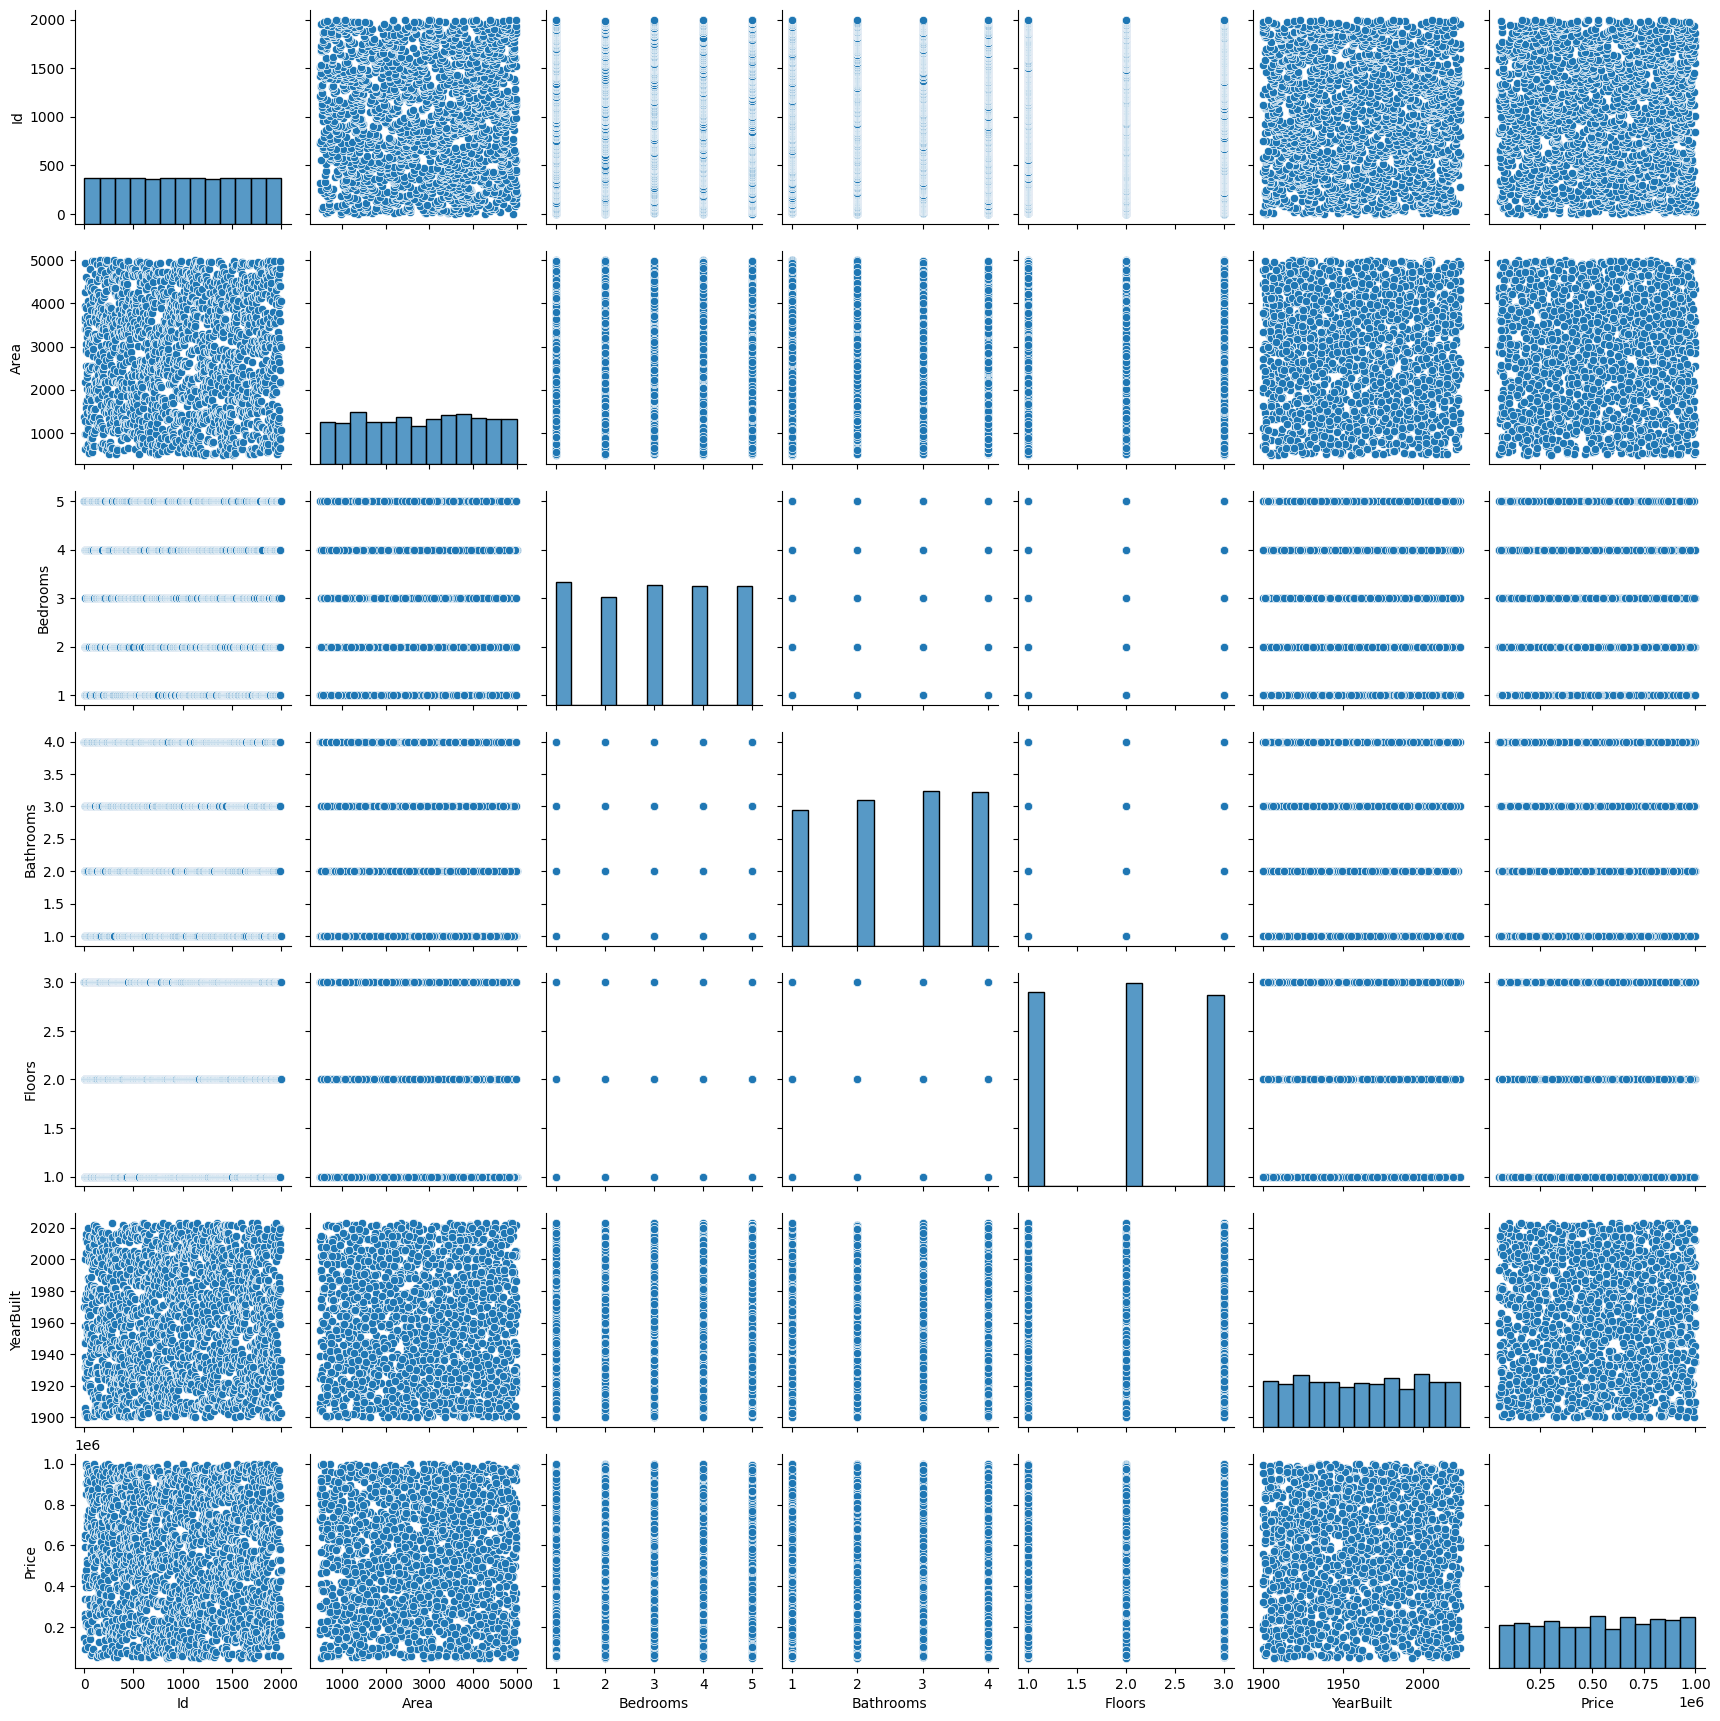

In [15]:
sns.pairplot(df)

<Axes: xlabel='Area', ylabel='Price'>

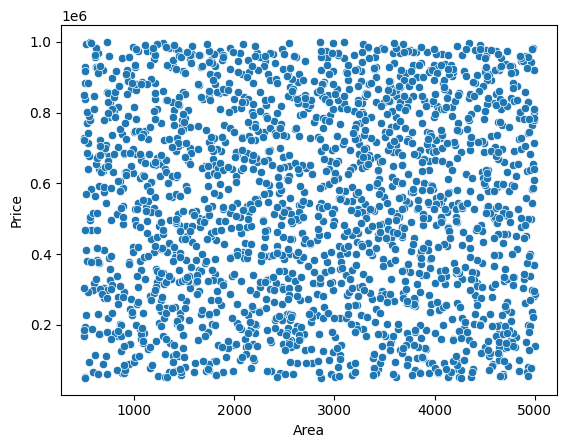

In [16]:
sns.scatterplot(x=df['Area'],y=df['Price'])

# splitting data into features and target

In [17]:
X=df.iloc[:,:9]
y=df.iloc[:,-1]

In [18]:
X.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
0,1,1360,5,4,3,1970,Downtown,Excellent,No
1,2,4272,5,4,3,1958,Downtown,Excellent,No
2,3,3592,2,2,3,1938,Downtown,Good,No
3,4,966,4,2,2,1902,Suburban,Fair,Yes
4,5,4926,1,4,2,1975,Downtown,Fair,Yes


In [19]:
y.head()

0    149919
1    424998
2    266746
3    244020
4    636056
Name: Price, dtype: int64

# Preprocessing data

In [20]:
X.drop("Id",axis=1,inplace=True)
print(X.shape)
X.head()

(2000, 8)


,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
0,1360,5,4,3,1970,Downtown,Excellent,No
1,4272,5,4,3,1958,Downtown,Excellent,No
2,3592,2,2,3,1938,Downtown,Good,No
3,966,4,2,2,1902,Suburban,Fair,Yes
4,4926,1,4,2,1975,Downtown,Fair,Yes


In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X[['Area']])

StandardScaler()

In [22]:
a = scaler.transform(X[['Area']]) 

In [23]:
scaled_area = pd.DataFrame(a,columns=['Area'])
scaled_area.head()

,Area
0,-1.101471
1,1.147485
2,0.622317
3,-1.405759
4,1.652574


In [24]:
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder(categories=[['Downtown', 'Suburban', 'Urban', 'Rural'],
                              ['Excellent', 'Good', 'Fair', 'Poor'],
                              ['No', 'Yes']])

In [25]:
oe.fit(X[['Location','Condition','Garage']])

OrdinalEncoder(categories=[['Downtown', 'Suburban', 'Urban', 'Rural'],
                           ['Excellent', 'Good', 'Fair', 'Poor'],
                           ['No', 'Yes']])

In [26]:
categorical_df = oe.transform(X[['Location','Condition','Garage']])

In [27]:
categorical_df

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       ...,
       [3., 3., 0.],
       [2., 0., 1.],
       [1., 2., 0.]])

In [28]:
categorical_df = pd.DataFrame( categorical_df,columns=['Location','Condition','Garage'])

In [29]:
categorical_df.head()

,Location,Condition,Garage
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,2.0,1.0
4,0.0,2.0,1.0


In [30]:
X= X.drop(['Area','Location','Condition','Garage'],axis=1)
X.head()

,Bedrooms,Bathrooms,Floors,YearBuilt
0,5,4,3,1970
1,5,4,3,1958
2,2,2,3,1938
3,4,2,2,1902
4,1,4,2,1975


In [31]:
X = X.join(categorical_df).join(scaled_area)

In [32]:
X.shape

(2000, 8)

In [33]:
X.head()

,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Area
0,5,4,3,1970,0.0,0.0,0.0,-1.101471
1,5,4,3,1958,0.0,0.0,0.0,1.147485
2,2,2,3,1938,0.0,1.0,0.0,0.622317
3,4,2,2,1902,1.0,2.0,1.0,-1.405759
4,1,4,2,1975,0.0,2.0,1.0,1.652574


# split into training and testing datasets

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1600, 8) (1600,) (400, 8) (400,)


# model training

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [36]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [37]:
y_pred=rf.predict(X_test)

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("mean_absolute_error: ",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error (y_test,y_pred))
print("r2_score: ",r2_score (y_test, y_pred))

mean_absolute_error:  254062.602725
MSE 86144730311.54414
r2_score:  -0.10727541725785827


# Hyperparameter tuning

In [39]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

In [40]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }

In [41]:
rf = RandomForestRegressor()

In [42]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [43]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [44]:
rf_grid.best_params_

{'max_depth': 2, 'max_features': 0.2, 'max_samples': 0.75, 'n_estimators': 120}

In [45]:
rf_grid.best_score_

-0.0016555565515412375

In [57]:
model=rf_grid.best_estimator_

[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_est

# prediction on new data

In [74]:
def call():
    ask=input("Want to predict house value? (Yes/No): ")
    if (ask == "Yes" or ask=='yes'):
        print("\n\n")
        prediction()
    else:
        print("Thanks")

In [75]:
def prediction():

    #Taking Inputs
    bedr = int(input("Enter number of bedrooms: "))
    bathr = int(input("Enter number of bathrooms: "))
    floors = int(input("Enter number of floors: "))
    year = int(input("Enter year built: "))
    locat = input("Enter location of the house from 'Downtown', 'Suburban', 'Urban', 'Rural': ")
    cond = input("Enter condition of the house from 'Excellent', 'Good', 'Fair', 'Poor': ")
    gar = input("Enter if garage present (Yes/No): ")
    ar = int(input("Enter area of the house: "))

    #Preprocessing
    num = scaler.transform([[ar]])
    cat = oe.transform([[locat,cond,gar]])
    
    #prediction
    print("Price of house with entered details:",model.predict(np.array([[bedr,bathr,floors,year,cat[0,0],cat[0,1],cat[0,2],num[0,0]]])) ,"\n\n")
    call()

In [77]:
call()

Want to predict house value? (Yes/No):  No


Thanks


# Deployment work

In [55]:
print('numpy',np.__version__)
print('pandas',pd.__version__)
print('matplotlib',matplotlib.__version__)
print('seaborn',sns.__version__)
print('scikit',sklearn.__version__)

numpy 1.26.4
pandas 2.2.3
matplotlib 3.9.2
seaborn 0.13.2
scikit 1.6.1


In [63]:
with open('model.pkl','wb') as file:
    pickle.dump(model,file)

In [79]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

with open('oe.pkl','wb') as file:
    pickle.dump(oe,file)